<a href="https://colab.research.google.com/github/ElpoderdelComputo/Tutoriales_YouTube/blob/main/Red_cov22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerias

import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Arquitectura del modelo
def build_model(optimizer,kz,drop):
    model = keras.Sequential([
        keras.Input(shape=(20, 20, 3)),
        layers.Conv2D(filters=32, kernel_size=kz, activation="relu"),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(filters=64, kernel_size=kz, activation="relu"),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(filters=128, kernel_size=kz, activation="relu"),
        layers.Flatten(),
        layers.Dropout(drop),
        layers.Dense(4, activation="softmax")
        ])
    model.compile(optimizer=optimizer,
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [ ]:
# Leer las imagenes de entrenamiento
data_entrenamiento = '/content/drive/MyDrive/Img_mezcla/TRAIN'

# Muestra cuantas imagenes hay por clase
print('\nNumero de clases:', len(os.listdir(data_entrenamiento)))


Numero de clases: 4


In [ ]:
batch_size = 12
epochs = 30

#Preparamos imagenes de entrenamiento
entrenamiento_datagen = ImageDataGenerator(
    rescale=1./255)

train_images = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(20, 20),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=1)

Found 320 images belonging to 4 classes.


In [ ]:
# Leer las imagenes de Validacion
data_valida = '/content/drive/MyDrive/Img_mezcla/VALIDA'

In [ ]:
# preparamos las imagenes de Validacion
prueba_datagen = ImageDataGenerator(
    rescale=1. / 255)

valida_images = prueba_datagen.flow_from_directory(
    data_valida,
    target_size=(20, 20),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=1)


Found 80 images belonging to 4 classes.


In [ ]:
# Leer las imagenes de TEST
data_test = '/content/drive/MyDrive/Img_mezcla/TEST'

In [ ]:
# preparamos las imagenes para predecir
prueba_datagen = ImageDataGenerator(
    rescale=1. / 255)

test_images = prueba_datagen.flow_from_directory(
    data_test,
    target_size=(20, 20),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=1)

Found 80 images belonging to 4 classes.


In [ ]:
print('\nInicia Entrenamiento y ajuste del modelo')
# Definimos parametros del modelo
kernel_size = 3
drop_out = 0.15
optimizer = 'adam'

model = build_model(optimizer, kernel_size, drop_out)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="cnn_L8.keras",
        save_best_only=True,
        monitor="val_loss",
        verbose=1)]



Inicia Entrenamiento y ajuste del modelo


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 128)               0

In [ ]:
from numpy.random.mtrand import seed
print('\n\nINICIA TEST\n')
history = model.fit(
    train_images,
    epochs=30,
    batch_size=12,
    validation_data=test_images,
    callbacks=callbacks)

print('FIN')



INICIA TEST

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 1.4220 - accuracy: 0.1562
Epoch 1: val_loss improved from inf to 1.32698, saving model to cnn_L8.keras
27/27 [==============================] - 299s 11s/step - loss: 1.4220 - accuracy: 0.1562 - val_loss: 1.3270 - val_accuracy: 0.2625
Epoch 2/30
26/27 [===========================>..] - ETA: 0s - loss: 1.3289 - accuracy: 0.2792
Epoch 2: val_loss improved from 1.32698 to 1.27071, saving model to cnn_L8.keras
27/27 [==============================] - 1s 28ms/step - loss: 1.3420 - accuracy: 0.2688 - val_loss: 1.2707 - val_accuracy: 0.2500
Epoch 3/30
27/27 [==============================] - ETA: 0s - loss: 1.2975 - accuracy: 0.3313
Epoch 3: val_loss improved from 1.27071 to 1.23851, saving model to cnn_L8.keras
27/27 [==============================] - 1s 27ms/step - loss: 1.2975 - accuracy: 0.3313 - val_loss: 1.2385 - val_accuracy: 0.4625
Epoch 4/30
25/27 [==========================>...] - ETA: 0s - loss: 1.175

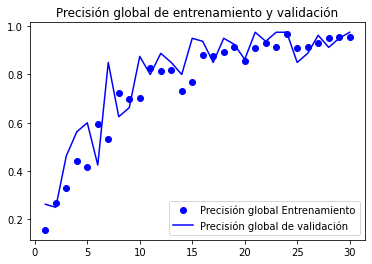

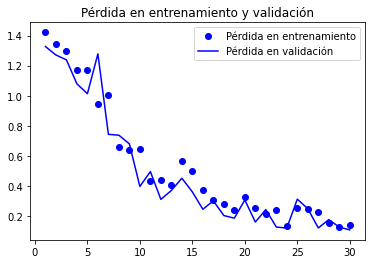

In [ ]:
## Graficando perdidas
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Precisión global Entrenamiento")
plt.plot(epochs, val_accuracy, "b", label="Precisión global de validación")
plt.title("Precisión global de entrenamiento y validación")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Pérdida en entrenamiento")
plt.plot(epochs, val_loss, "b", label="Pérdida en validación")
plt.title("Pérdida en entrenamiento y validación")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("cnn_L8.keras")
test_loss, test_acc = model.evaluate(test_images)
print(f"Val accuracy: {test_acc:.3f}")

7/7 [==============================] - 0s 18ms/step - loss: 0.1069 - accuracy: 0.9750
Val accuracy: 0.975


In [ ]:
import sklearn.metrics as metrics
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = model.predict_generator(test_images)
y_pred = np.argmax(Y_pred, axis=1)

print('Matriz de confusión\n')
print(confusion_matrix(test_images.classes, y_pred))
print('\n Reporte de Clasificación\n')

target_names = test_images.classes
class_labels = list(test_images.class_indices.keys())
report = classification_report(target_names, y_pred, target_names=class_labels)
print(report)

<ipython-input-14-f75546f6db58>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_images)


Matriz de confusión

[[20  0  0  0]
 [ 0 20  0  0]
 [ 0  2 18  0]
 [ 0  0  0 20]]

 Reporte de Clasificación

              precision    recall  f1-score   support

  1.Agricola       1.00      1.00      1.00        20
2.Pastizales       0.91      1.00      0.95        20
3.Vegetacion       1.00      0.90      0.95        20
    4.Urbano       1.00      1.00      1.00        20

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



[Text(0.5, 1.0, 'Matriz de confusión CNN'),
 Text(0.5, 0, 'Clases predichas'),
 Text(0, 0.5, 'Clases verdaderas')]

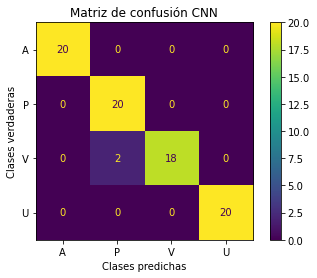

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
#cm = confusion_matrix(Pred_images.classes, y_pred, normalize='true')
cm = confusion_matrix(test_images.classes, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['A','P','V','U'])
cm_display.plot()
# Agrega titulos y ejes y mostrar
cm_display.ax_.set(title='Matriz de confusión CNN', xlabel='Clases predichas', ylabel='Clases verdaderas')

In [ ]:
# Preprocesando una imagen
import numpy as np

#img_path = keras.utils.load_img(path ="/content/drive/MyDrive/Img_redCovNet/Vegetacion 26.jpg")
img_path = "/content/drive/MyDrive/Img_mezcla/VALIDA/1.Agricola/Agricola 13.jpg"

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(img_path,
                               target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size=(20, 20))

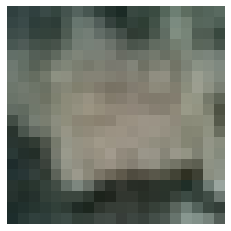

In [ ]:
# Mostrar una imagen
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

In [ ]:
from tensorflow.keras import layers

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 138ms/step
(1, 7, 7, 64)


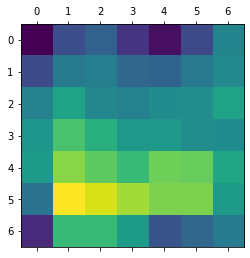

In [ ]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[2]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 5], cmap="viridis")

<ipython-input-20-71d4850419c0>:14: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


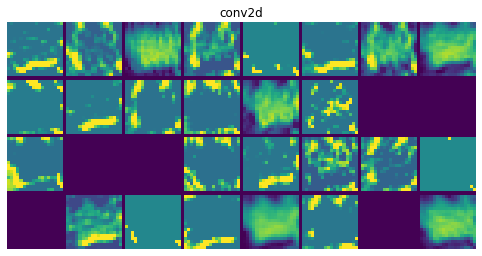

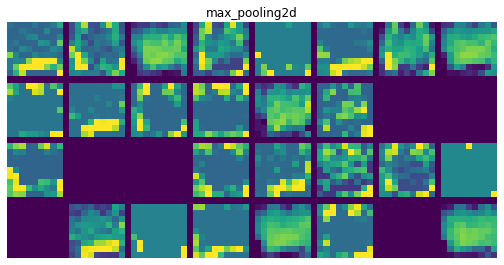

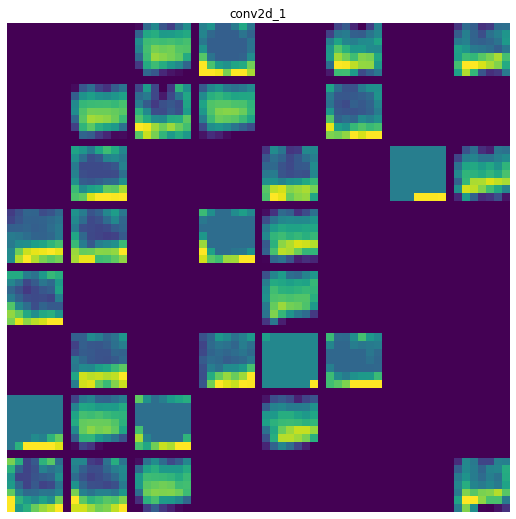

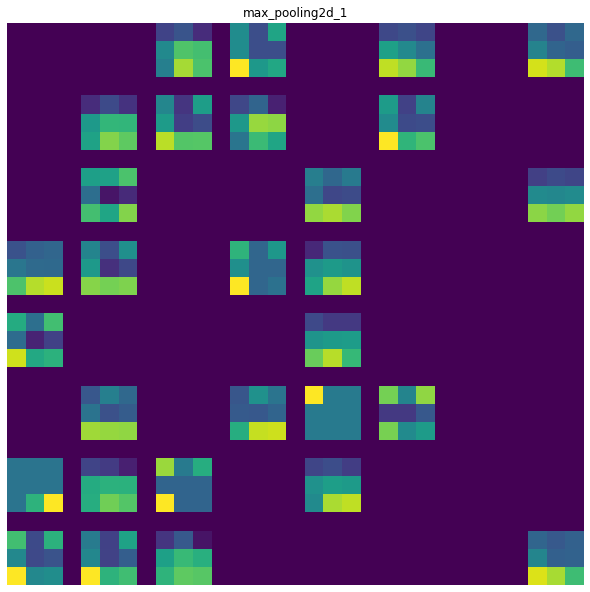

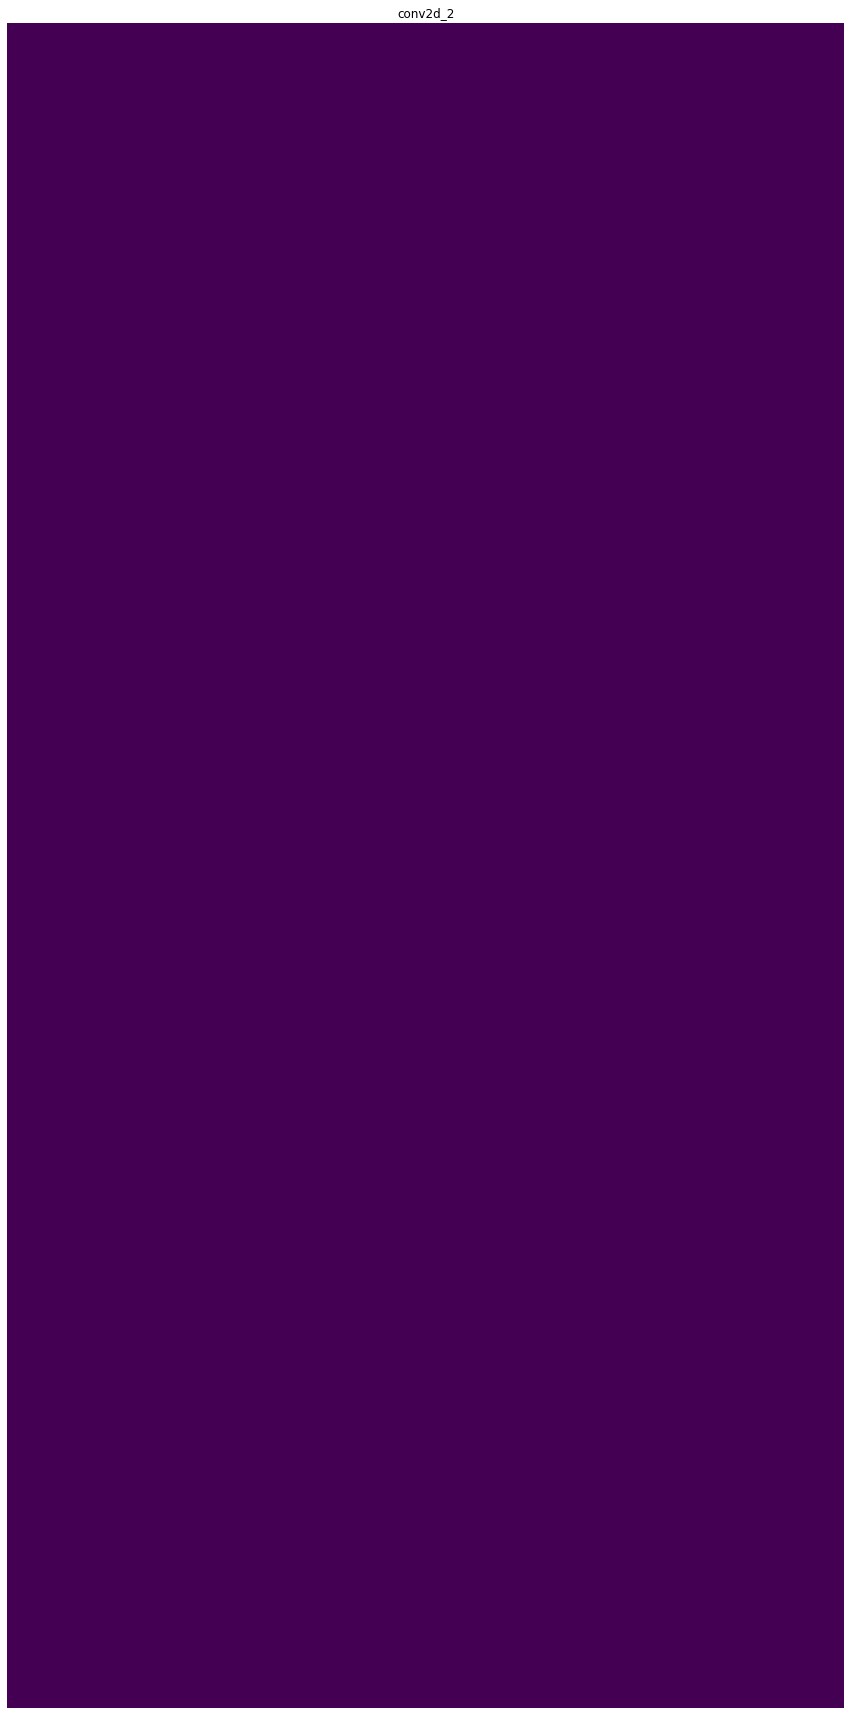

In [ ]:
images_per_row = 8
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
                             images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

In [ ]:
'''
from numpy.random.mtrand import seed
resulta = []
contar = 1
kernel = [2,3]
dropout = [0.1,0.15,0.2,0.25]
Loptimizer = ['rmsprop','adam']

k=0
for i in kernel:
  kernel_size = kernel[k]
  d=0
  for j in dropout:
    drop_out= dropout[d]
    z = 0
    for o in Loptimizer:
      optimizer = Loptimizer[z]
      print('\n\nModelo: ', contar,' kernel: ',kernel_size, ' drop_out: ',drop_out, ' Optimizer: ', optimizer )

      model = build_model(optimizer, kernel_size, drop_out)
      callbacks = [
          keras.callbacks.ModelCheckpoint(
             filepath="convnet_from_scratch.keras",
             save_best_only=True,
             monitor="val_loss",
             verbose=1)]

      history = model.fit(
            train_images,
            epochs=30,
            batch_size=16,
            validation_data=test_images,
            callbacks=callbacks)
      model = keras.models.load_model("convnet_from_scratch.keras")
      test_loss, test_acc = model.evaluate(Pred_images)
      print(f"Test accuracy: {test_acc:.3f}")
      contar+=1
      z+=1
    d+=1
  k+=1

'''

'\nfrom numpy.random.mtrand import seed\nresulta = []\ncontar = 1\nkernel = [2,3]\ndropout = [0.1,0.15,0.2,0.25]\nLoptimizer = [\'rmsprop\',\'adam\']\n\nk=0\nfor i in kernel:\n  kernel_size = kernel[k]\n  d=0\n  for j in dropout:\n    drop_out= dropout[d]\n    z = 0\n    for o in Loptimizer:\n      optimizer = Loptimizer[z]\n      print(\'\n\nModelo: \', contar,\' kernel: \',kernel_size, \' drop_out: \',drop_out, \' Optimizer: \', optimizer )\n\n      model = build_model(optimizer, kernel_size, drop_out)\n      callbacks = [\n          keras.callbacks.ModelCheckpoint(\n             filepath="convnet_from_scratch.keras",\n             save_best_only=True,\n             monitor="val_loss",\n             verbose=1)]\n               \n      history = model.fit(\n            train_images,\n            epochs=30,\n            batch_size=16,\n            validation_data=test_images,\n            callbacks=callbacks)\n      model = keras.models.load_model("convnet_from_scratch.keras")\n      t

In [ ]:
from sklearn.model_selection import KFold
'''
data_entrenamiento = '/content/drive/MyDrive/Img_redCovNet/TRAIN'

# Define el tamaño de lote
batch_size = 12

# Prepara las imágenes de entrenamiento
entrenamiento_datagen = ImageDataGenerator(rescale=1./255)
'''
# Define las clases
classes = ['clase1', 'clase2', 'clase3', 'clase4']
'''
train_images = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(20, 20),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=1,
    classes=classes)
'''
# Muestra cuantas imagenes hay por clase
print('\nNumero de clases:', len(os.listdir(data_entrenamiento)))

# Define el número de pliegues para la validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Entrena el modelo para cada pliegue
for i, (train_idx, test_idx) in enumerate(kfold.split(train_images)):
    # Crea los generadores de imágenes para el pliegue actual
    train_images_fold = train_images.__class__(
        train_images.directory,
        train_images.image_data_generator,
        target_size=train_images.target_size,
        color_mode=train_images.color_mode,
        classes=train_images.classes,
        class_mode=train_images.class_mode,
        data_format=train_images.data_format,
        shuffle=False,
        subset=train_images.subset,
        interpolation=train_images.interpolation,
        dtype=train_images.dtype
    )
    train_images_fold.index_array = train_idx

    val_images_fold = train_images.__class__(
        train_images.directory,
        train_images.image_data_generator,
        target_size=train_images.target_size,
        color_mode=train_images.color_mode,
        classes=train_images.classes,
        class_mode=train_images.class_mode,
        data_format=train_images.data_format,
        shuffle=False,
        subset=train_images.subset,
        interpolation=train_images.interpolation,
        dtype=train_images.dtype
    )
    val_images_fold.index_array = test_idx

    # Crea un nuevo modelo para el pliegue actual
    model = model = keras.Sequential([
        keras.Input(shape=(20, 20, 3)),
        layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(4, activation="softmax")
        ])
    model.compile(optimizer=optimizer,
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    # Entrena el modelo para el pliegue actual
    history = model.fit(
        train_images_fold,
        epochs=30,
        batch_size=batch_size,
        validation_data=val_images_fold,
        callbacks=callbacks
    )

    # Evalúa el modelo en el conjunto de prueba
    test_loss, test_acc = model.evaluate(test_images)
    print(f"Accuracy en pliegue {i}: {test_acc}")


Found 0 images belonging to 4 classes.

Numero de clases: 4


ValueError: ignored